In [34]:
import pandas as pd
import matplotlib.pyplot as plt
url = "http://datos.igac.gov.co/datasets/c2b2cbf67faa49b5951bd78499a1d8a8_0.csv"
df = pd.read_csv(url)

In [17]:
print(df.head())

   OBJECTID   ANO  MES  DIA  HORA     DECL  HORIZONTAL   VERTICAL  \
0      3001  1955    5    6     1  1.16833   30456.792  20415.666   
1      3002  1955    5    6     2  1.17167   30441.474  20421.854   
2      3003  1955    5    6     3  1.18333   30444.786  20424.402   
3      3004  1955    5    6     4  1.18333   30454.722  20423.310   
4      3005  1955    5    6     5  1.18500   30450.582  20420.034   

         NORTE       ESTE    INT_TOTAL      INCL  
0  30450.46020  621.00943  36666.27329  33.83457  
1  30435.10922  622.46774  36656.99742  33.85593  
2  30438.29313  628.73338  36661.16735  33.85636  
3  30448.22702  628.93857  36668.81077  33.84629  
4  30444.06959  629.73866  36663.54774  33.84564  


In [18]:
#I'm Going to change the names of the columns in order to Pandas recognize the datatype
names = {"ANO":"year", "MES":"month", "DIA":"day", "HORA":"hour"}
df = df.rename(columns=names)

In [19]:
df.index= pd.to_datetime(df[["year","month", "day","hour"]])

In [20]:
df = df[["DECL"]]

In [21]:
print(df.head())

                        DECL
1955-05-06 01:00:00  1.16833
1955-05-06 02:00:00  1.17167
1955-05-06 03:00:00  1.18333
1955-05-06 04:00:00  1.18333
1955-05-06 05:00:00  1.18500


In [22]:
print(len(df))

525960


In [23]:
df = df.dropna()
df = df[df.DECL != 0]

In [24]:
print(len(df))

507222


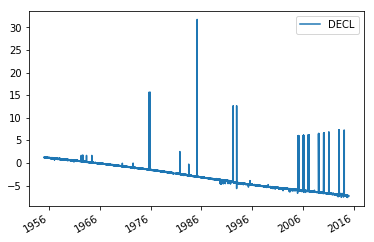

In [25]:
df.plot()

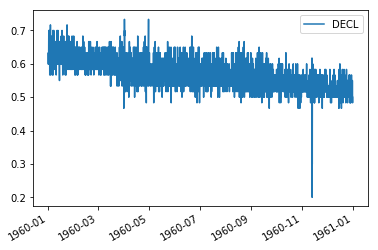

In [26]:
df["1960-01":"1960-12"].plot()

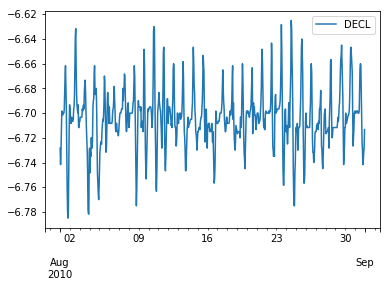

In [27]:
df["2010-08"].plot()

In [28]:
media_mensual = df.resample("m").mean()
print(media_mensual.head())

                DECL
1955-01-31  1.219433
1955-02-28  1.205724
1955-03-31  1.194596
1955-04-30  1.183870
1955-05-31  1.175746


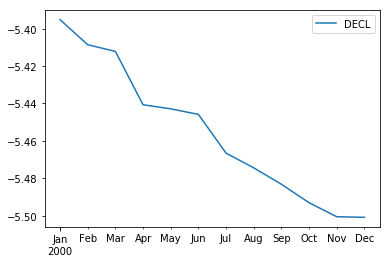

In [30]:
media_mensual["2000"].plot()

In [31]:
y = media_mensual["2000"].DECL.values
x = media_mensual["2000"].index.astype(int)

In [32]:
coefs = np.polyfit(x,y,1)

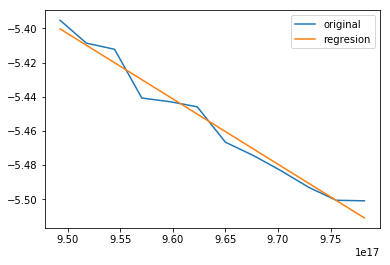

In [35]:
plt.plot(x,y,label="original")
plt.plot(x,x*coefs[0]+coefs[1], label="regresion")
plt.legend()